### SEDS HW1


* Import common libraries for data management

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

* Download  and unzip the database file

In [3]:
%%bash
wget http://faculty.washington.edu/dacb/HCEPDB_moldata.zip
unzip HCEPDB_moldata.zip

Archive:  HCEPDB_moldata.zip
  inflating: HCEPDB_moldata.csv      


--2017-01-16 20:35:11--  http://faculty.washington.edu/dacb/HCEPDB_moldata.zip
Resolving faculty.washington.edu... 128.95.155.199, 128.95.155.137, 128.95.155.136
Connecting to faculty.washington.edu|128.95.155.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176492030 (168M) [application/zip]
Saving to: ‘HCEPDB_moldata.zip’

     0K .......... .......... .......... .......... ..........  0% 1.84M 91s
    50K .......... .......... .......... .......... ..........  0% 1.86M 91s
   100K .......... .......... .......... .......... ..........  0% 3.74M 76s
   150K .......... .......... .......... .......... ..........  0% 3.10M 70s
   200K .......... .......... .......... .......... ..........  0% 3.76M 65s
   250K .......... .......... .......... .......... ..........  0% 4.32M 61s
   300K .......... .......... .......... .......... ..........  0% 5.29M 57s
   350K .......... .......... .......... .......... ..........  0% 5.29M 53s
   400K .......... ..........

* Read the csv file and declare a few variables

In [27]:
data=pd.read_csv("HCEPDB_moldata.csv")
pce=data['pce']
gap=data['e_gap_alpha']

* Plot a scatter plot of band gap vs photoconversion efficiency

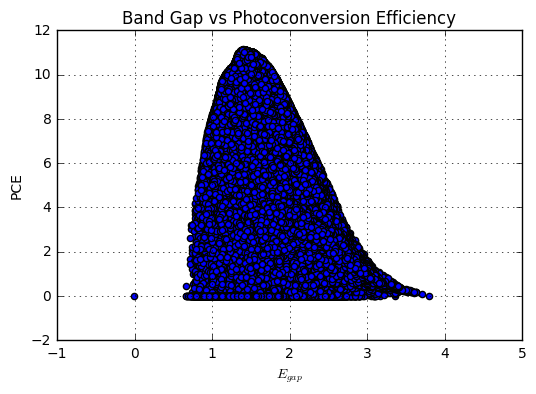

In [13]:
plt.scatter(gap,pce)
plt.xlabel('$E_{gap}$')
plt.ylabel('PCE')
plt.title('Band Gap vs Photoconversion Efficiency')
plt.grid()

* Create a new column with mass ratio to methane

In [23]:
data['mass_ratio_CH4']=data['mass']/16.04246
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,mass_ratio_CH4,gap_group
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,24.579466,"(1.774, 2.0274]"
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...,24.959607,"(1.52, 1.774]"
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...,22.658015,"(1.266, 1.52]"
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...,19.912457,"(1.52, 1.774]"
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1,23.645987,"(1.774, 2.0274]"


* Bin the molecules by band gap and look at how many molecules fall into each interval

In [30]:
data['gap_group']=pd.cut(data['e_gap_alpha'], 15)
pd.value_counts(data['gap_group'])

(1.774, 2.0274]      531884
(1.52, 1.774]        504597
(2.0274, 2.281]      435123
(1.266, 1.52]        323498
(2.281, 2.535]       262903
(1.0122, 1.266]      124249
(2.535, 2.789]       101413
(2.789, 3.0426]       25060
(0.758, 1.0122]        9900
(3.0426, 3.296]        3906
(3.296, 3.55]           259
(0.505, 0.758]           41
(3.55, 3.804]            15
(-0.00675, 0.251]         1
(0.251, 0.505]            0
Name: gap_group, dtype: int64

* Show number of molecules in each cololumn

In [25]:
data.groupby(data['gap_group']).count()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,mass_ratio_CH4
gap_group,,,,,,,,,,,,
"(-0.00675, 0.251]",1,1,1,1,1,1,1,1,1,1,1,1
"(0.251, 0.505]",0,0,0,0,0,0,0,0,0,0,0,0
"(0.505, 0.758]",41,41,41,41,41,41,41,41,41,41,41,41
"(0.758, 1.0122]",9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9898,9900
"(1.0122, 1.266]",124249,124249,124249,124249,124249,124249,124249,124249,124249,124249,123716,124249
"(1.266, 1.52]",323498,323498,323498,323498,323498,323498,323498,323498,323498,323498,318952,323498
"(1.52, 1.774]",504597,504597,504597,504597,504597,504597,504597,504597,504597,504597,492626,504597
"(1.774, 2.0274]",531884,531884,531884,531884,531884,531884,531884,531884,531884,531884,511899,531884
"(2.0274, 2.281]",435123,435123,435123,435123,435123,435123,435123,435123,435123,435123,408295,435123


* Show the statistics for each group

In [26]:
data.groupby(['gap_group'])['mass'].describe()

gap_group               
(-0.00675, 0.251]  count       1.000000
                   mean      388.506200
                   std              NaN
                   min       388.506200
                   25%       388.506200
                   50%       388.506200
                   75%       388.506200
                   max       388.506200
(0.251, 0.505]     count       0.000000
                   mean             NaN
                   std              NaN
                   min              NaN
                   25%              NaN
                   50%              NaN
                   75%              NaN
                   max              NaN
(0.505, 0.758]     count      41.000000
                   mean      500.026302
                   std        27.643114
                   min       433.681100
                   25%       500.653800
                   50%       513.652900
                   75%       514.637000
                   max       530.704000
(0.758, 1.0122]

* Visualize the data

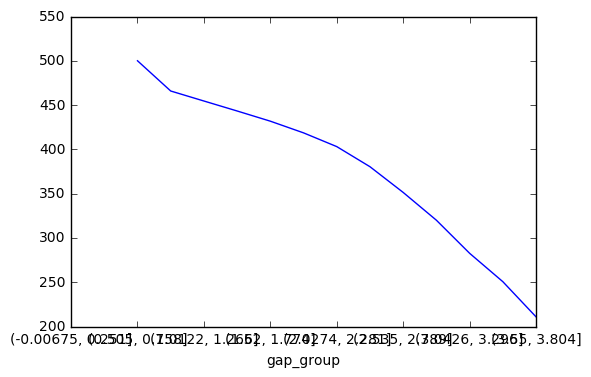

In [31]:
data.groupby(['gap_group'])['mass'].mean().plot()